<a href="https://colab.research.google.com/github/roshan5619/Deep_Learning/blob/main/Titanic_Spaceship_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
data_train=pd.read_csv('/content/train(1).csv')
data_test=pd.read_csv('/content/test(1).csv')

In [3]:
data_submission=pd.read_csv('/content/sample_submission.csv')
data_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


# Let's Understand the dataset

In [50]:
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
data_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [8]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
data_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [10]:
data_train.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [11]:
data_test.isnull().sum()

,0
PassengerId,0
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98


In [12]:
data_train.nunique()

,0
PassengerId,8693
HomePlanet,3
CryoSleep,2
Cabin,6560
Destination,3
Age,80
VIP,2
RoomService,1273
FoodCourt,1507
ShoppingMall,1115


so we can get to know that there are total 6 planets(3-homeplanet,3-destination)
Here,name of passengers,age doesn't play to predict the transported.

First we will analyze how many passengers are reached destination correctly and wrong.

We need to classify the passengerId that the Transported is True or False(Analyzed from sample submission of dataset)

#EDA

Which age people are transporting more and identify the tranported percentage

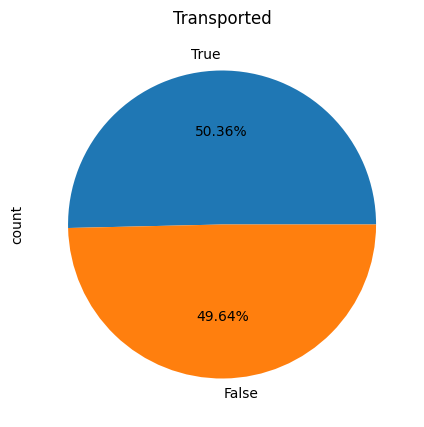

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

data_train.Transported.value_counts().plot(kind='pie',autopct='%.2f%%').set_title('Transported')
plt.show()

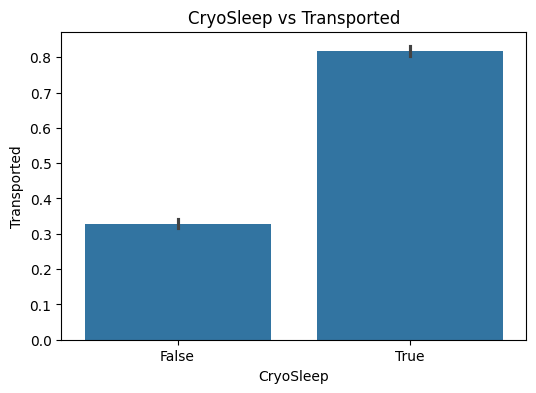

In [14]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot(x='CryoSleep', y='Transported', data=data_train)
plt.title('CryoSleep vs Transported')
plt.show()

From above we can understand that passenger in Cryosleep is **more likely** to Transported Truely,so will add the feature **Cryosleep** to predict Transported

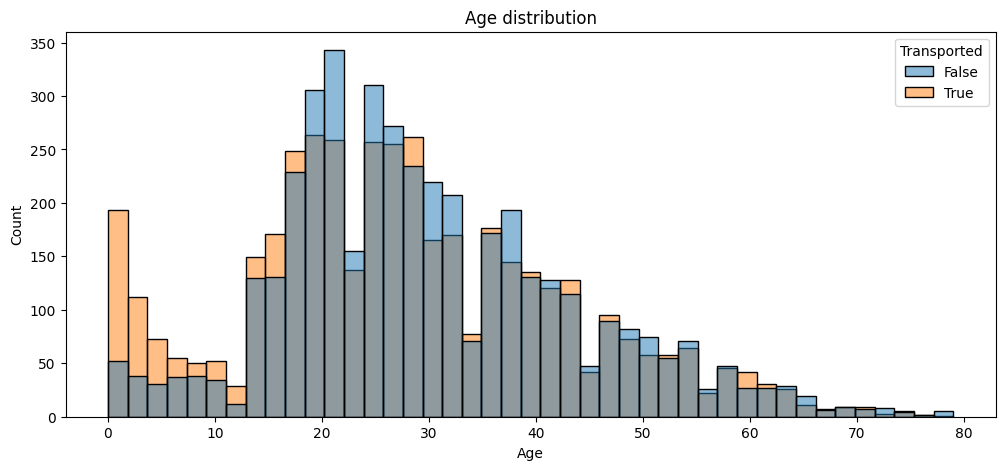

In [15]:
plt.figure(figsize=(12,5))

# Histogram
sns.histplot(x='Age', hue='Transported',data=data_train)
plt.title('Age distribution')
plt.show()

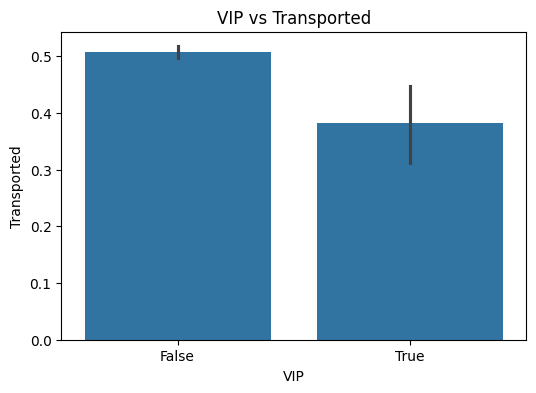

In [16]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot(x='VIP', y='Transported', data=data_train)
plt.title('VIP vs Transported')
plt.show()

So,VIP is very less in predicting true trasnported,so we don't want to work on this feature.

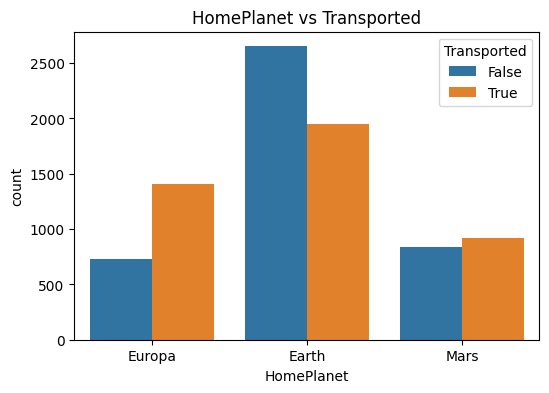

In [17]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='HomePlanet', hue='Transported', data=data_train)
plt.title('HomePlanet vs Transported')
plt.show()

here we can observe that passengers in **Earth** are not transported correctly compared to passengers from **Europa** and **Mars**

In [18]:
overview = data_train.groupby(['HomePlanet', 'Transported']).size().unstack()
print(overview)


Transported  False  True 
HomePlanet               
Earth         2651   1951
Europa         727   1404
Mars           839    920


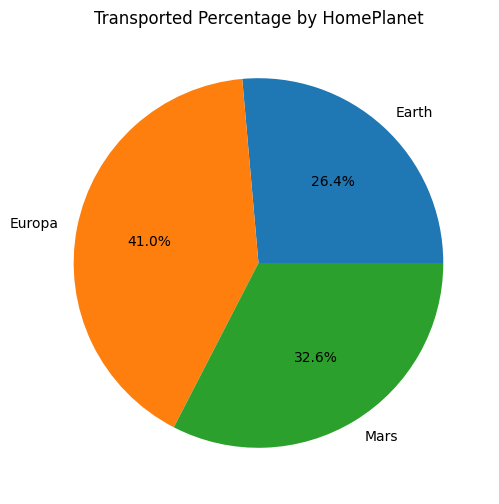

In [19]:
homeplanet_pie = data_train.groupby('HomePlanet')['Transported'].mean()
plt.figure(figsize=(6, 6))
plt.pie(homeplanet_pie, labels=homeplanet_pie.index, autopct='%1.1f%%')
plt.title('Transported Percentage by HomePlanet')
plt.show()

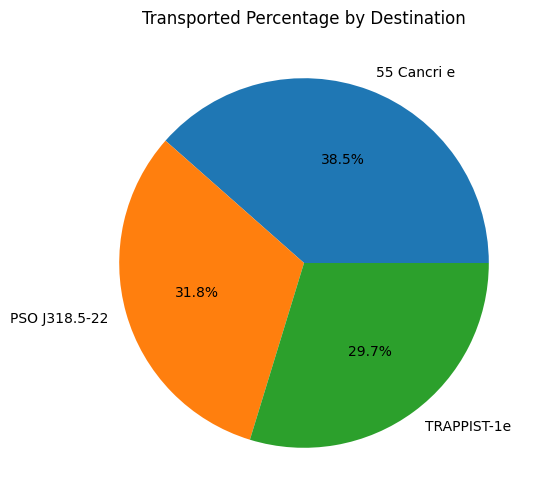

In [20]:
dest_pie = data_train.groupby('Destination')['Transported'].mean()
plt.figure(figsize=(6, 6))
plt.pie(dest_pie, labels=dest_pie.index, autopct='%1.1f%%')
plt.title('Transported Percentage by Destination')
plt.show()

# Advanced  Analysis

Earlier we have seen the age distribution but it looks unclear,so let's break down by creating groups.

Age_group
+50_Age       811
-12_Age       765
12-18_Age     780
18-25_Age    2108
25-35_Age    2177
35-50_Age    1873
Name: count, dtype: int64


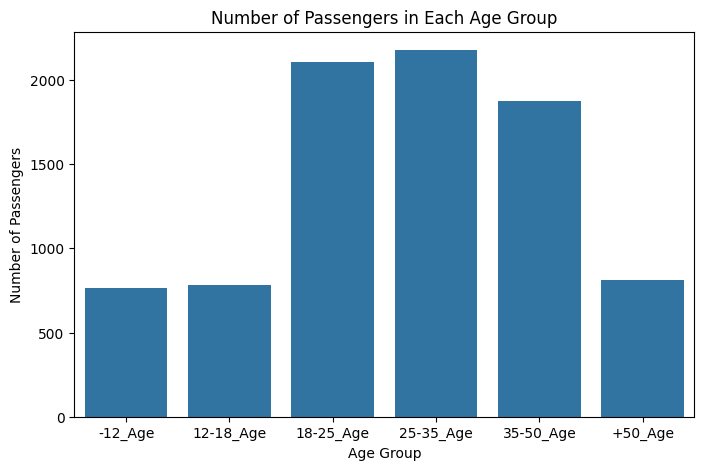

In [21]:

def get_age_group(age):
    if age < 12:
        return '-12_Age'
    elif 12 <= age < 18:
        return '12-18_Age'
    elif 18 <= age < 25:
        return '18-25_Age'
    elif 25 <= age < 35:
        return '25-35_Age'
    elif 35 <= age < 50:
        return '35-50_Age'
    elif age >= 50:
        return '+50_Age'
    else:
        return None
data_train['Age_group'] = data_train['Age'].apply(get_age_group)
print(data_train['Age_group'].value_counts().sort_index())

plt.figure(figsize=(8, 5))
sns.countplot(data=data_train, x='Age_group', order=[
    '-12_Age', '12-18_Age', '18-25_Age', '25-35_Age', '35-50_Age', '+50_Age'
])

plt.title('Number of Passengers in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')

plt.show()


    Since  each Passanger is having a unique id called passengerId(gggg_pp) will try to identify the no of groups are there &
    
     how many passangers in each group,so that we can identify whethere the group with more people is **Transported** true or false

In [22]:
# Extract group number from PassengerId (format: gggg_pp)
data_train['Group'] = data_train['PassengerId'].str.split('_').str[0]

# Count unique groups
unique_groups = data_train['Group'].nunique()
print(f"Number of unique groups: {unique_groups}")

# Count passengers in each group
group_counts = data_train['Group'].value_counts().sort_index()
print("Passengers per group:\n", group_counts)

Number of unique groups: 6217
Passengers per group:
 Group
0001    1
0002    1
0003    2
0004    1
0005    1
       ..
9275    3
9276    1
9278    1
9279    1
9280    2
Name: count, Length: 6217, dtype: int64


In [23]:
group_counts.to_csv('group_passenger_counts.csv', header=['PassengerCount'])


In [24]:
df_temp=pd.read_csv('/content/group_passenger_counts.csv')

In [25]:
df_temp.head()

,Group,PassengerCount
0,1,1
1,2,1
2,3,2
3,4,1
4,5,1


okie,now we will identify it's group number

In [26]:
groups_with_8 = group_counts[group_counts == 8].index.tolist()

print("Groups with exactly 8 passengers:")
for group in groups_with_8:
    print(f"Group {group}: 8 passengers")


Groups with exactly 8 passengers:
Group 0984: 8 passengers
Group 4005: 8 passengers
Group 4256: 8 passengers
Group 4498: 8 passengers
Group 5133: 8 passengers
Group 5756: 8 passengers
Group 5885: 8 passengers
Group 8168: 8 passengers
Group 8728: 8 passengers
Group 8796: 8 passengers
Group 8956: 8 passengers
Group 8988: 8 passengers
Group 9081: 8 passengers


Now we have the list of groups with max passengers,so will see whether the passengers are correctly transported or not

In [27]:
groups_with_8 = group_counts[group_counts == 8].index.tolist()
print("Groups with exactly 8 passengers:")
for group in groups_with_8:
    print(f"Group {group}: 8 passengers")
    print(data_train[data_train['Group'] == group][['PassengerId','Name','Transported']])
    print("\n")

Groups with exactly 8 passengers:
Group 0984: 8 passengers
    PassengerId                Name  Transported
910     0984_01         Wen Woodwin        False
911     0984_02                 NaN        False
912     0984_03  Morrie Sweekstarks        False
913     0984_04    Lyde Sweekstarks         True
914     0984_05  Greggy Sweekstarks        False
915     0984_06  Walley Sweekstarks         True
916     0984_07      Shery Flemaney        False
917     0984_08     Alancy Flemaney         True


Group 4005: 8 passengers
     PassengerId                Name  Transported
3736     4005_01  Jonaye Castannison         True
3737     4005_02  Aarone Castannison         True
3738     4005_03  Cliney Castannison        False
3739     4005_04        Dia Spentley        False
3740     4005_05        Lorian River         True
3741     4005_06           Son River         True
3742     4005_07  Bobina Castannison         True
3743     4005_08                 NaN        False


Group 4256: 8 passeng

Instead of thsi,let's plot all teh transported for count of passengers in how many groups.

In [28]:
# New features --Passenger_Group and Passenger_Group_Size
data_train['Passenger_Group'] = data_train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
data_train['Passenger_Group_Size'] = data_train['Passenger_Group'].apply(lambda x: data_train['Passenger_Group'].value_counts()[x])

Text(0.5, 1.0, 'Passenger_Group_Size')

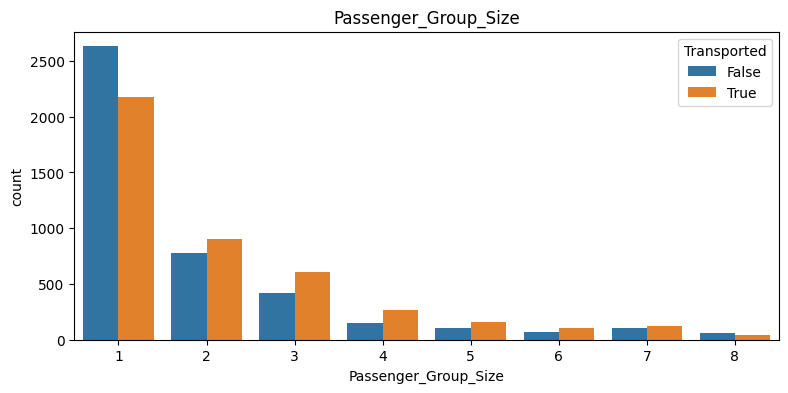

In [29]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,2) #no.of rows in grid,no.of col in grid,index of subplot within that grid
sns.countplot(data=data_train[data_train.Transported.isnull()==False], x='Passenger_Group_Size', hue='Transported')
plt.title('Passenger_Group_Size')


Let's understan about the deck,num,side from cabin

In [30]:
data_train['Cabin'].isnull().sum()

np.int64(199)

In [31]:
data_train['Cabin'].fillna('Missing')

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S
...,...
8688,A/98/P
8689,G/1499/S
8690,G/1500/S
8691,E/608/S


In [32]:
data_train['Cabin'].isnull().sum()

np.int64(199)

so we need to know about the destination of the passenger from homeplanet.
so,we can find correlation between destination and Homeplanet

In [33]:
grouped_by_dest=data_train.groupby(['HomePlanet','Destination'])['HomePlanet'].size().unstack().fillna(0).astype(int)
grouped_by_dest.head()

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
HomePlanet,,,
Earth,690,712,3101
Europa,886,19,1189
Mars,193,49,1475


<Axes: xlabel='HomePlanet', ylabel='Destination'>

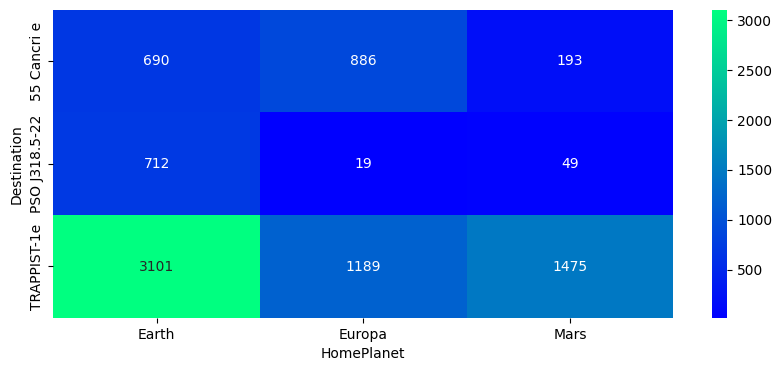

In [34]:
plt.figure(figsize=(10,4))
sns.heatmap(grouped_by_dest.T, annot=True, fmt='g', cmap='winter')

We can understand that many passengers destination from Earth is to reach **TRAPPIST-1e**
Europa and from Mars also the same.

# Dimensionality Reduction

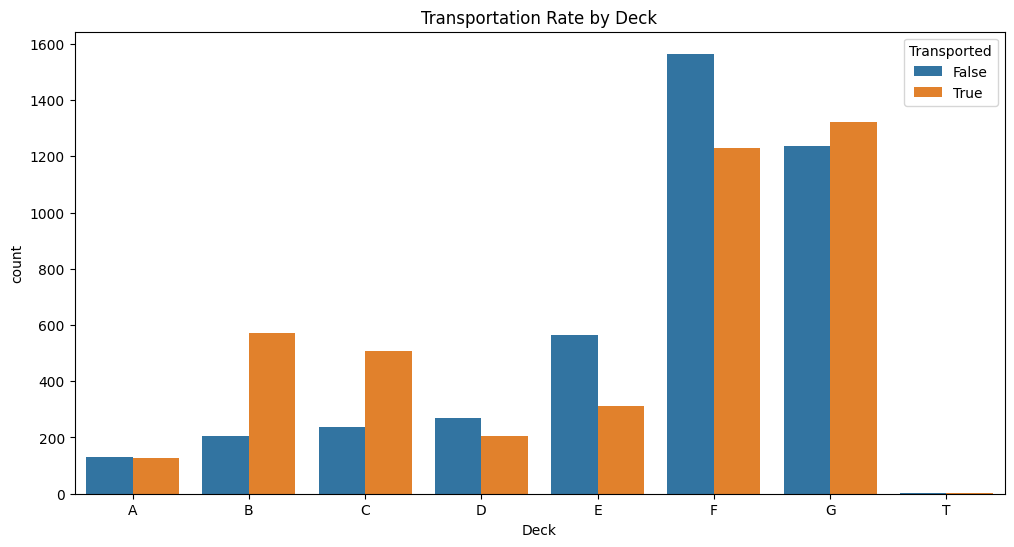

In [36]:
data_train['Deck'] = data_train['Cabin'].str.split('/').str[0]
if 'Deck' in data_train.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data_train, x='Deck', hue='Transported', order=sorted(data_train['Deck'].dropna().unique()))
    plt.title("Transportation Rate by Deck")
    plt.show()

In [37]:
data_train['Deck'] = data_train['Cabin'].str.split('/').str[0]
deck_transport_table = pd.crosstab(data_train['Deck'], data_train['Transported'])
print(deck_transport_table)


Transported  False  True 
Deck                     
A              129    127
B              207    572
C              239    508
D              271    207
E              563    313
F             1565   1229
G             1238   1321
T                4      1


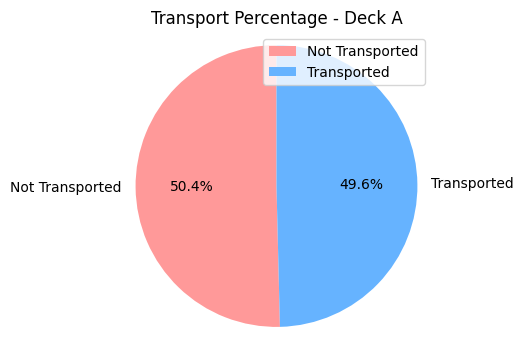

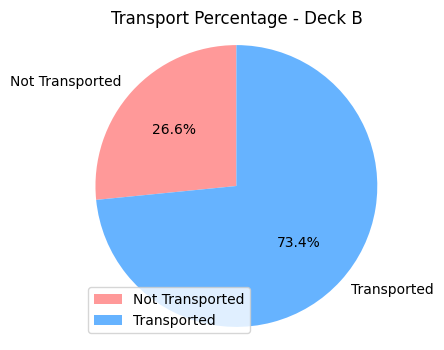

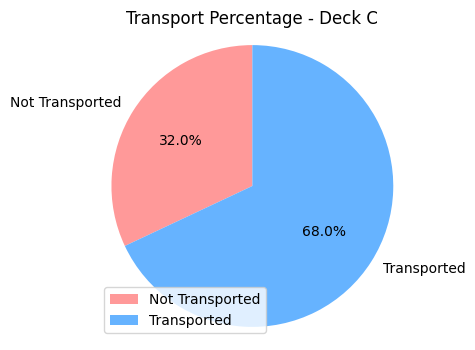

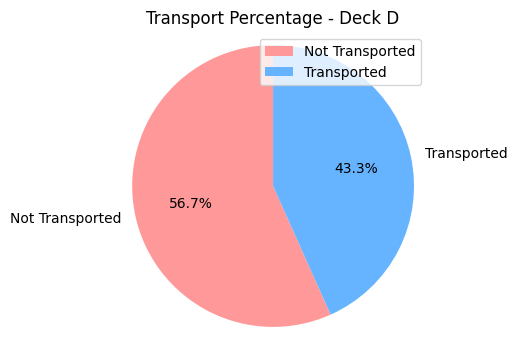

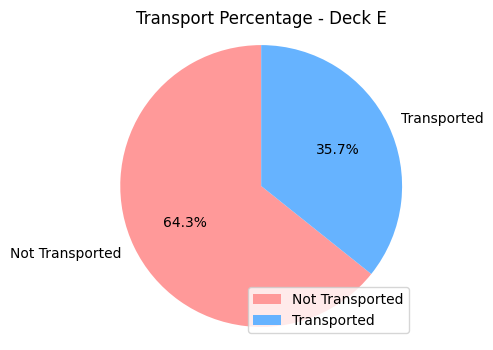

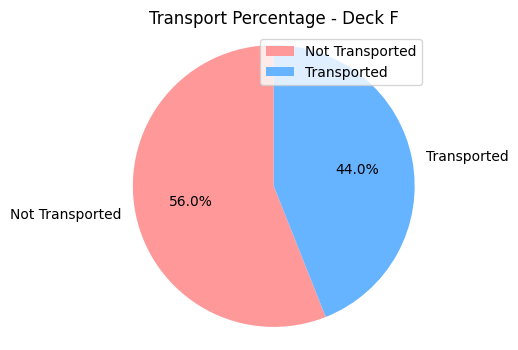

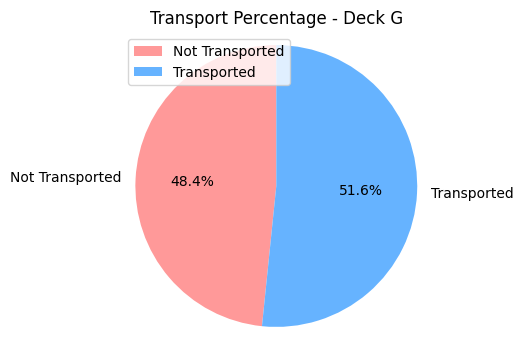

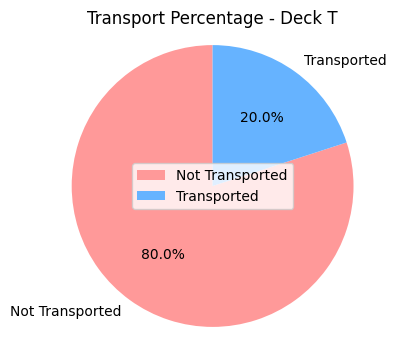

In [41]:
deck_transport_table_pie = pd.crosstab(data_train['Deck'], data_train['Transported']) * 100
# Plot one pie chart per deck
for deck in deck_transport_table_pie.index:
    labels = ['Not Transported', 'Transported']
    values = deck_transport_table_pie.loc[deck]

    plt.figure(figsize=(4, 4))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
    plt.title(f"Transport Percentage - Deck {deck}")
    plt.axis('equal')
    plt.legend()
    plt.show()


# DR(unwanted)

In [52]:
numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

In [53]:
# for col in numeric_features:
#     data_train[col] = data_train[col].fillna(data_train[col].median())

# for col in categorical_features:
#     data_train[col] = data_train[col].fillna(data_train[col].mode()[0])

<ipython-input-53-1973556877>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train[col] = data_train[col].fillna(data_train[col].mode()[0])


In [54]:
data_train['Cabin_Deck'] = data_train['Cabin'].str.split('/').str[0]
data_train['Cabin_Num'] = data_train['Cabin'].str.split('/').str[1]
data_train['Cabin_Side'] = data_train['Cabin'].str.split('/').str[2]

data_train['Cabin_Deck'] = data_train['Cabin_Deck'].fillna('Unknown')
data_train['Cabin_Num'] = pd.to_numeric(data_train['Cabin_Num'], errors='coerce').fillna(0)
data_train['Cabin_Side'] = data_train['Cabin_Side'].fillna('Unknown')

data_train['Total_Spending'] = data_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
data_train['Is_Big_Spender'] = (data_train['Total_Spending'] > data_train['Total_Spending'].quantile(0.75)).astype(int)
data_train['Age_Group'] = pd.cut(data_train['Age'], bins=[0, 18, 35, 50, 100], labels=['Child', 'Young', 'Middle', 'Senior'])

In [60]:
print(data_train['Age_Group'])

0       Middle
1        Young
2       Senior
3        Young
4        Child
         ...  
8688    Middle
8689     Child
8690     Young
8691     Young
8692    Middle
Name: Age_Group, Length: 8693, dtype: category
Categories (4, object): ['Child' < 'Young' < 'Middle' < 'Senior']


In [61]:
le = LabelEncoder()
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_Side', 'Age_Group']

for col in categorical_cols:
    data_train[col + '_encoded'] = le.fit_transform(data_train[col].astype(str))

feature_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
                  'Cabin_Num', 'Total_Spending', 'Is_Big_Spender'] + [col + '_encoded' for col in categorical_cols]

In [80]:
X = data_train[feature_columns]
y = data_train['Transported'].astype(int)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_model, X_val, y_train_model, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)
X_train_model_scaled = scaler.fit_transform(X_train_model)

# PCA

<ipython-input-88-3281035532>:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train[col] = data_train[col].fillna(data_train[col].mode()[0])


Original feature shape: (8693, 16)
Feature columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num', 'Total_Spending', 'Is_Big_Spender', 'HomePlanet_encoded', 'CryoSleep_encoded', 'Destination_encoded', 'VIP_encoded', 'Cabin_Deck_encoded', 'Cabin_Side_encoded', 'Age_Group_encoded']
Explained variance by each component:
PC1: 0.2251
PC2: 0.0996
PC3: 0.0854
PC4: 0.0664
PC5: 0.0632
PC6: 0.0599
PC7: 0.0590
PC8: 0.0573
PC9: 0.0549
PC10: 0.0518

Cumulative explained variance:
First 1 components: 0.2251
First 2 components: 0.3247
First 3 components: 0.4101
First 4 components: 0.4765
First 5 components: 0.5397
First 6 components: 0.5996
First 7 components: 0.6586
First 8 components: 0.7159
First 9 components: 0.7708
First 10 components: 0.8225

Components needed for 90% variance: 12
Components needed for 95% variance: 13


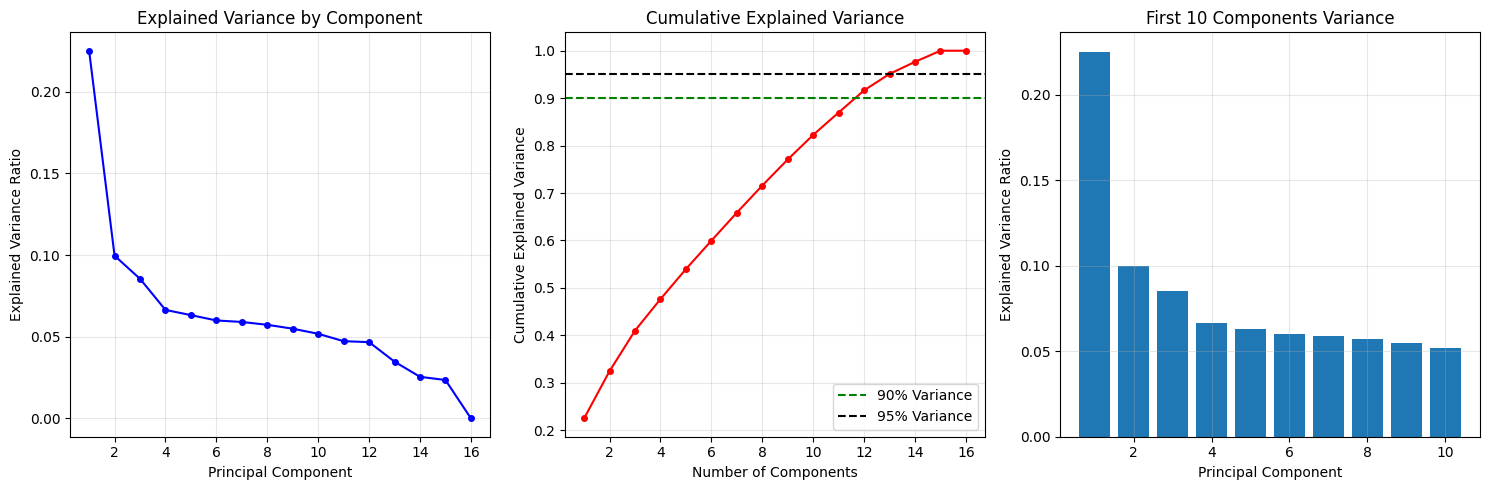


PCA 2D Results:
PC1 explained variance: 0.2251
PC2 explained variance: 0.0996
Total explained variance (2D): 0.3247


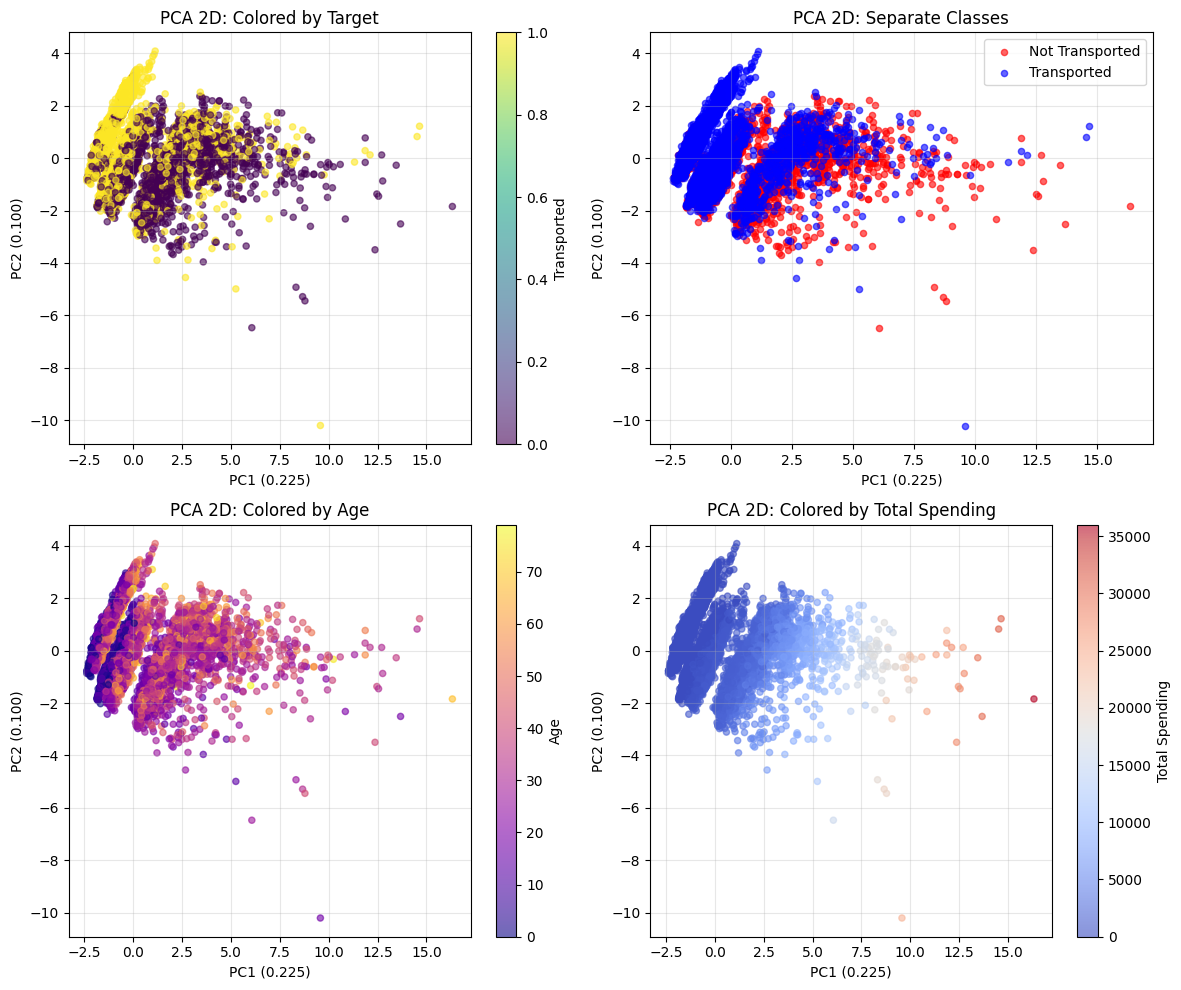


Top 10 Features contributing to PC1:
               Feature  PC1_Contribution
7       Total_Spending          0.483302
8       Is_Big_Spender          0.417348
2            FoodCourt          0.344549
13  Cabin_Deck_encoded         -0.308219
5               VRDeck          0.285982
4                  Spa          0.284426
10   CryoSleep_encoded         -0.232916
6            Cabin_Num         -0.201638
0                  Age          0.170885
9   HomePlanet_encoded          0.170345

Top 10 Features contributing to PC2:
                Feature  PC2_Contribution
10    CryoSleep_encoded          0.489772
6             Cabin_Num         -0.445455
13   Cabin_Deck_encoded         -0.439138
9    HomePlanet_encoded          0.312612
11  Destination_encoded         -0.264521
3          ShoppingMall         -0.240116
1           RoomService         -0.230054
8        Is_Big_Spender         -0.168008
0                   Age          0.141580
7        Total_Spending         -0.140316


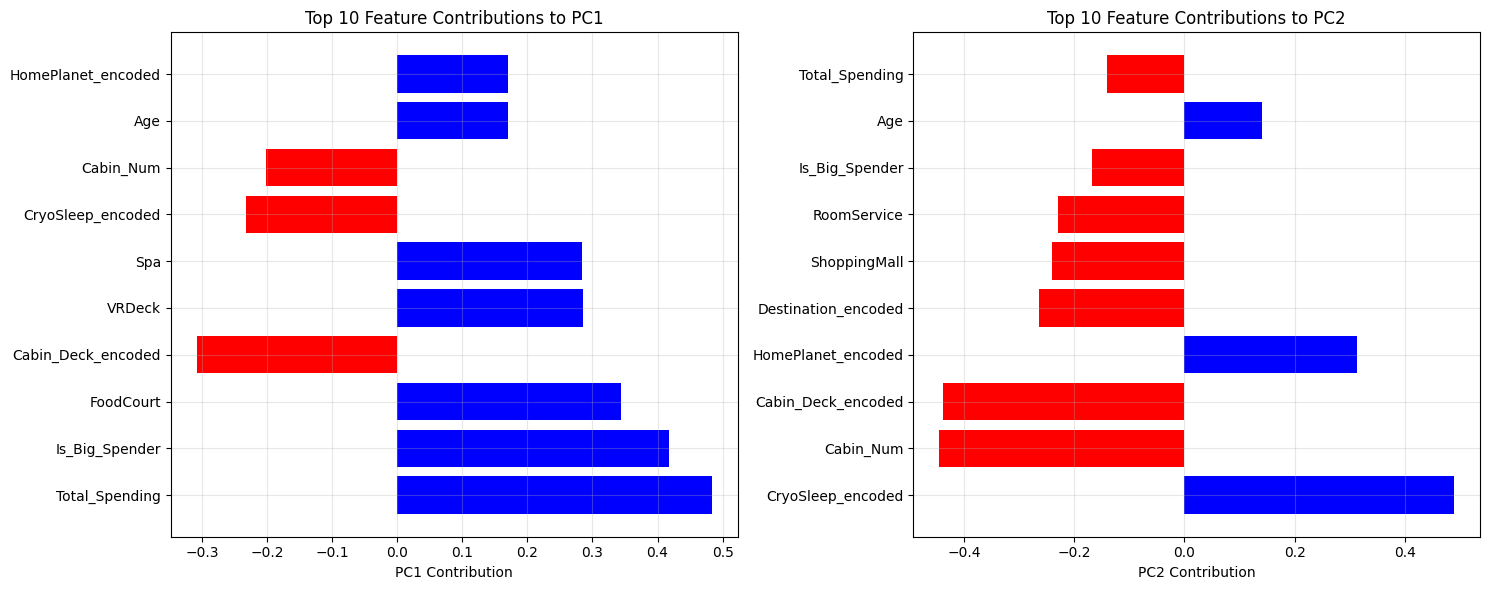


PCA Summary:
Original_Features: 16
PC1_Variance: 0.22508664226982783
PC2_Variance: 0.09957262261777704
Total_2D_Variance: 0.3246592648876049
Components_for_90_percent: 12
Components_for_95_percent: 13


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

data_train = pd.read_csv('/content/train(1).csv')

numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for col in numeric_features:
    data_train[col] = data_train[col].fillna(data_train[col].median())

for col in categorical_features:
    data_train[col] = data_train[col].fillna(data_train[col].mode()[0])

data_train['Cabin_Deck'] = data_train['Cabin'].str.split('/').str[0]
data_train['Cabin_Num'] = data_train['Cabin'].str.split('/').str[1]
data_train['Cabin_Side'] = data_train['Cabin'].str.split('/').str[2]

data_train['Cabin_Deck'] = data_train['Cabin_Deck'].fillna('Unknown')
data_train['Cabin_Num'] = pd.to_numeric(data_train['Cabin_Num'], errors='coerce').fillna(0)
data_train['Cabin_Side'] = data_train['Cabin_Side'].fillna('Unknown')

data_train['Total_Spending'] = data_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
data_train['Is_Big_Spender'] = (data_train['Total_Spending'] > data_train['Total_Spending'].quantile(0.75)).astype(int)
data_train['Age_Group'] = pd.cut(data_train['Age'], bins=[0, 18, 35, 50, 100], labels=['Child', 'Young', 'Middle', 'Senior'])

le = LabelEncoder()
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_Side', 'Age_Group']

for col in categorical_cols:
    data_train[col + '_encoded'] = le.fit_transform(data_train[col].astype(str))

feature_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
                  'Cabin_Num', 'Total_Spending', 'Is_Big_Spender'] + [col + '_encoded' for col in categorical_cols]

X = data_train[feature_columns]
y = data_train['Transported'].astype(int)

print("Original feature shape:", X.shape)
print("Feature columns:", feature_columns)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Explained variance by each component:")
for i, var in enumerate(explained_variance_ratio[:10]):
    print(f"PC{i+1}: {var:.4f}")

print(f"\nCumulative explained variance:")
for i in range(0, min(10, len(cumulative_variance))):
    print(f"First {i+1} components: {cumulative_variance[i]:.4f}")

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\nComponents needed for 90% variance: {n_components_90}")
print(f"Components needed for 95% variance: {n_components_95}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-', markersize=4)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', markersize=4)
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='k', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.bar(range(1, min(11, len(explained_variance_ratio) + 1)), explained_variance_ratio[:10])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('First 10 Components Variance')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"\nPCA 2D Results:")
print(f"PC1 explained variance: {pca_2d.explained_variance_ratio_[0]:.4f}")
print(f"PC2 explained variance: {pca_2d.explained_variance_ratio_[1]:.4f}")
print(f"Total explained variance (2D): {sum(pca_2d.explained_variance_ratio_):.4f}")

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.6, s=20)
plt.colorbar(scatter, label='Transported')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.3f})')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.3f})')
plt.title('PCA 2D: Colored by Target')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
colors = ['red', 'blue']
labels = ['Not Transported', 'Transported']
for i, (color, label) in enumerate(zip(colors, labels)):
    mask = y == i
    plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1], c=color, alpha=0.6, s=20, label=label)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.3f})')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.3f})')
plt.title('PCA 2D: Separate Classes')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=data_train['Age'], cmap='plasma', alpha=0.6, s=20)
plt.colorbar(label='Age')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.3f})')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.3f})')
plt.title('PCA 2D: Colored by Age')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=data_train['Total_Spending'], cmap='coolwarm', alpha=0.6, s=20)
plt.colorbar(label='Total Spending')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.3f})')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.3f})')
plt.title('PCA 2D: Colored by Total Spending')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

feature_contributions = pca_2d.components_

pc1_contributions = pd.DataFrame({
    'Feature': feature_columns,
    'PC1_Contribution': feature_contributions[0]
}).sort_values('PC1_Contribution', key=abs, ascending=False)

pc2_contributions = pd.DataFrame({
    'Feature': feature_columns,
    'PC2_Contribution': feature_contributions[1]
}).sort_values('PC2_Contribution', key=abs, ascending=False)

print("\nTop 10 Features contributing to PC1:")
print(pc1_contributions.head(10))

print("\nTop 10 Features contributing to PC2:")
print(pc2_contributions.head(10))

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
top_pc1 = pc1_contributions.head(10)
colors = ['red' if x < 0 else 'blue' for x in top_pc1['PC1_Contribution']]
plt.barh(range(len(top_pc1)), top_pc1['PC1_Contribution'], color=colors)
plt.yticks(range(len(top_pc1)), top_pc1['Feature'])
plt.xlabel('PC1 Contribution')
plt.title('Top 10 Feature Contributions to PC1')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
top_pc2 = pc2_contributions.head(10)
colors = ['red' if x < 0 else 'blue' for x in top_pc2['PC2_Contribution']]
plt.barh(range(len(top_pc2)), top_pc2['PC2_Contribution'], color=colors)
plt.yticks(range(len(top_pc2)), top_pc2['Feature'])
plt.xlabel('PC2 Contribution')
plt.title('Top 10 Feature Contributions to PC2')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

pca_results_summary = {
    'Original_Features': X.shape[1],
    'PC1_Variance': pca_2d.explained_variance_ratio_[0],
    'PC2_Variance': pca_2d.explained_variance_ratio_[1],
    'Total_2D_Variance': sum(pca_2d.explained_variance_ratio_),
    'Components_for_90_percent': n_components_90,
    'Components_for_95_percent': n_components_95
}

print(f"\nPCA Summary:")
for key, value in pca_results_summary.items():
    print(f"{key}: {value}")

### Model

In [89]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}


In [90]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [91]:
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")

    cv_scores = cross_val_score(model, X_train_model_scaled, y_train_model, cv=cv, scoring='accuracy')

    model.fit(X_train_model_scaled, y_train_model)

    val_pred = model.predict(X_val_scaled)
    val_pred_proba = model.predict_proba(X_val_scaled)[:, 1]

    val_accuracy = accuracy_score(y_val, val_pred)
    val_auc = roc_auc_score(y_val, val_pred_proba)

    results[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'val_accuracy': val_accuracy,
        'val_auc': val_auc,
        'model': model
    }

    print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Validation AUC: {val_auc:.4f}")



Training Logistic Regression...
CV Accuracy: 0.7917 (+/- 0.0206)
Validation Accuracy: 0.7728
Validation AUC: 0.8646

Training Random Forest...
CV Accuracy: 0.7992 (+/- 0.0069)
Validation Accuracy: 0.7786
Validation AUC: 0.8665

Training Gradient Boosting...
CV Accuracy: 0.8015 (+/- 0.0104)
Validation Accuracy: 0.7980
Validation AUC: 0.8858

Training SVM...
CV Accuracy: 0.7979 (+/- 0.0139)
Validation Accuracy: 0.7915
Validation AUC: 0.8636


In [93]:
results_df = pd.DataFrame({
    name: [result['cv_mean'], result['cv_std'], result['val_accuracy'], result['val_auc']]
    for name, result in results.items()
}, index=['CV_Mean', 'CV_Std', 'Val_Accuracy', 'Val_AUC'])

print("\nModel Comparison:")
print(results_df.round(3))


Model Comparison:
              Logistic Regression  Random Forest  Gradient Boosting    SVM
CV_Mean                     0.792          0.799              0.802  0.798
CV_Std                      0.010          0.003              0.005  0.007
Val_Accuracy                0.773          0.779              0.798  0.792
Val_AUC                     0.865          0.866              0.886  0.864


In [100]:
best_model_name1 = max(results, key=lambda k: results[k]['val_accuracy'])
best_model1 = results[best_model_name1]['model']

best_model_name2 = max(results, key=lambda k: results[k]['val_auc'])
best_model2 = results[best_model_name2]['model']

print(f"\nBest model based on Validation Accuracy: {best_model_name1}")
print(f"\nBest model based on Validation AUC: {best_model_name2}")


Best model based on Validation Accuracy: Gradient Boosting

Best model based on Validation AUC: Gradient Boosting


In [103]:
test_pred = best_model1.predict(X_test_scaled)
test_pred_proba = best_model1.predict_proba(X_test_scaled)[:, 1]

test_accuracy = accuracy_score(y_test, test_pred)
test_auc = roc_auc_score(y_test, test_pred_proba)

print(f"\nFinal Test Results for {best_model_name1}:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")


Final Test Results for Gradient Boosting:
Test Accuracy: 0.8068
Test AUC: 0.9003



Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       863
           1       0.79      0.84      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



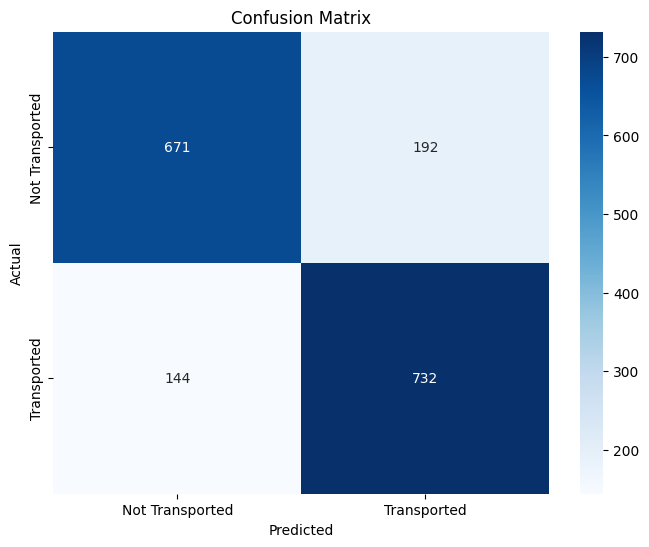

In [104]:
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Transported', 'Transported'],
            yticklabels=['Not Transported', 'Transported'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


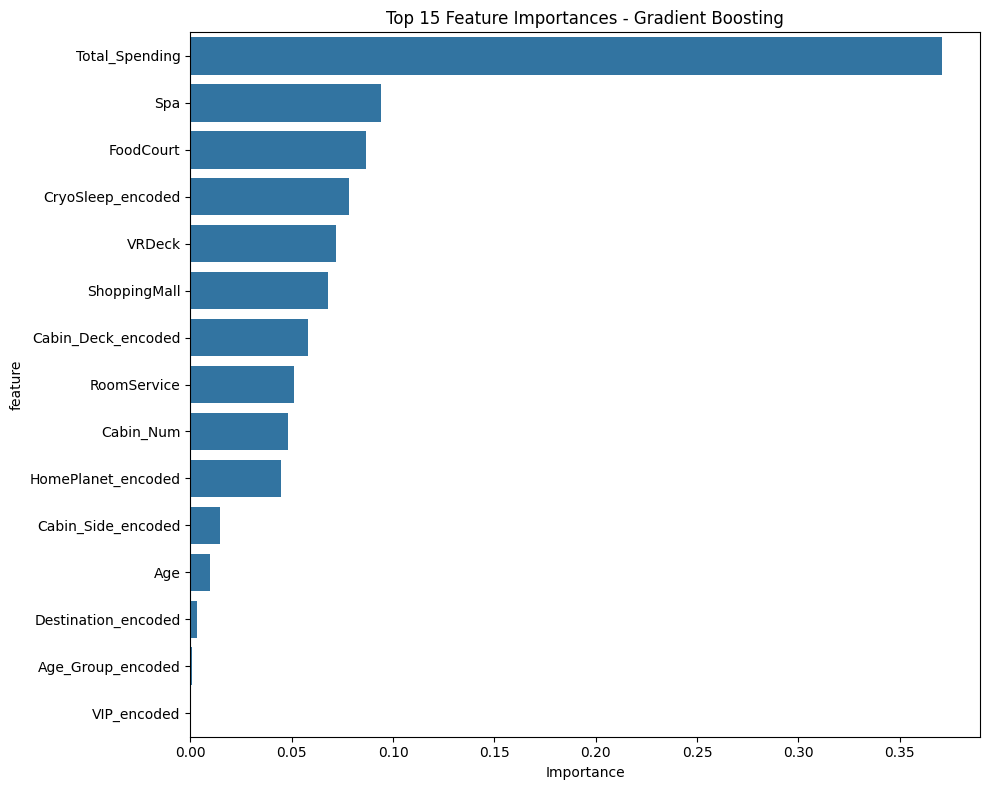


Top 10 Most Important Features:
               feature  importance
7       Total_Spending    0.371140
4                  Spa    0.094130
2            FoodCourt    0.086544
10   CryoSleep_encoded    0.078276
5               VRDeck    0.071663
3         ShoppingMall    0.067836
13  Cabin_Deck_encoded    0.057960
1          RoomService    0.050947
6            Cabin_Num    0.048262
9   HomePlanet_encoded    0.044586


In [108]:
if hasattr(best_model1, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': best_model1.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title(f'Top 15 Feature Importances - {best_model_name1}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

In [110]:
print("\nModel Performance Summary:")
for name, result in results.items():
    print(f"{name}: CV={result['cv_mean']:.4f}, Val_Acc={result['val_accuracy']:.4f}, Val_AUC={result['val_auc']:.4f}")

final_results = {
    'Best_Model': best_model_name1,
    'Test_Accuracy': test_accuracy,
    'Test_AUC': test_auc,
    'Components_for_95_variance': n_components_95
}
print(f"\nFinal Summary:")
for key, value in final_results.items():
    print(f"{key}: {value}")


Model Performance Summary:
Logistic Regression: CV=0.7917, Val_Acc=0.7728, Val_AUC=0.8646
Random Forest: CV=0.7992, Val_Acc=0.7786, Val_AUC=0.8665
Gradient Boosting: CV=0.8015, Val_Acc=0.7980, Val_AUC=0.8858
SVM: CV=0.7979, Val_Acc=0.7915, Val_AUC=0.8636

Final Summary:
Best_Model: Gradient Boosting
Test_Accuracy: 0.8067855089131685
Test_AUC: 0.9002629671370446
Components_for_95_variance: 13
